<a href="https://colab.research.google.com/github/Mmbsaksd/Appliance-Energy-Prediction/blob/main/Appliance_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Business Problem Understanding**


##**Data-driven prediction of energy use of appliances**
We should predict Appliance energy consumption for a house based on factors like temperature, humidity & pressure . In order to achieve this, we need to develop a supervised learning model using regression algorithms. Regression algorithms are used as data consist of continuous features and there are no identification of appliances in dataset.

**The Data :**
There are 29 features to describe appliances energy use :
1. date : time year-month-day hour:minute:second
2. lights : energy use of light fixtures in the house in Wh
3. T1 : Temperature in kitchen area, in Celsius
4. T2 : Temperature in living room area, in Celsius
5. T3 : Temperature in laundry room area
6. T4 : Temperature in office room, in Celsius
7. T5 : Temperature in bathroom, in Celsius
8. T6 : Temperature outside the building (north side), in Celsius
9. T7 : Temperature in ironing room, in Celsius
10.T8 : Temperature in teenager room 2, in Celsius
11. T9 : Temperature in parents’ room, in Celsius
12. T_out : Temperature outside (from Chievres weather station), in Celsius
13. Tdewpoint : (from Chievres weather station), Â°C
14. RH_1 : Humidity in kitchen area, in %
15. RH_2 : Humidity in living room area, in %
16. RH_3 : Humidity in laundry room area, in %
17. RH_4 : Humidity in office room, in %
18. RH_5 : Humidity in bathroom, in %
19. RH_6 : Humidity outside the building (north side), in %
20. RH_7 : Humidity in ironing room, in %
21. RH_8 : Humidity in teenager room 2, in %
22. RH_9 : Humidity in parents’ room, in %
23. RH_out :Humidity outside (from Chievres weather station), in %
24. Pressure : (from Chievres weather station), in mm Hg
25. Wind speed: (from Chievres weather station), in m/s
26. Visibility :(from Chievres weather station), in km
27. Rv1 :Random variable 1, non-dimensional
28. Rv2 :Random variable 2, non-dimensional
29. Appliances : Total energy used by appliances, in Wh


#**Data Preparation**

In [46]:
#Importing Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from datetime import timedelta
from math import sqrt

In [47]:
#Loading datasets
eng_df = pd.read_csv('/content/data_application_energy.csv')
eng_df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [48]:
eng_df.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [49]:
eng_df.shape

(19735, 29)

In [50]:
eng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [51]:
#Checking null value
eng_df.isnull().sum().sort_values(ascending=False)

date           0
T7             0
rv1            0
Tdewpoint      0
Visibility     0
Windspeed      0
RH_out         0
Press_mm_hg    0
T_out          0
RH_9           0
T9             0
RH_8           0
T8             0
RH_7           0
RH_6           0
Appliances     0
T6             0
RH_5           0
T5             0
RH_4           0
T4             0
RH_3           0
T3             0
RH_2           0
T2             0
RH_1           0
T1             0
lights         0
rv2            0
dtype: int64

# **Descriptive Analysis**

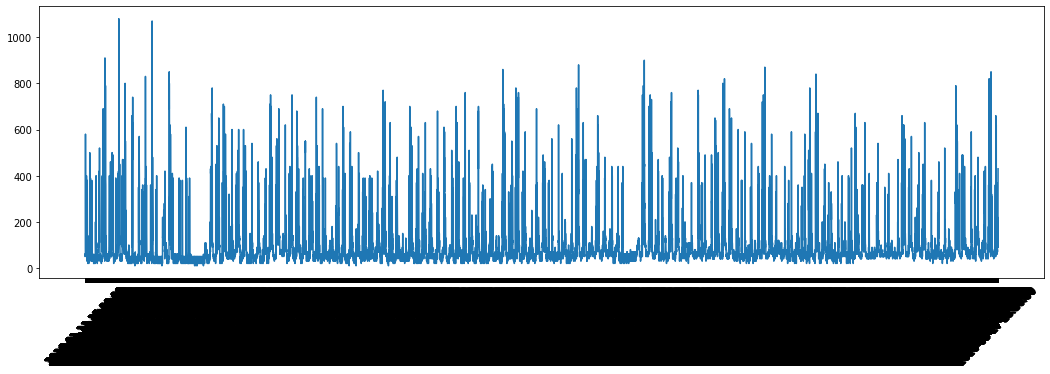

In [52]:
plt.rcParams['figure.figsize'] = (18,5)
plt.plot(eng_df.date, eng_df.Appliances)
plt.xticks(rotation = 45)
plt.show()

In [53]:
#Checking the columns for the classification
eng_df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [54]:
#Checking the Temperature variation
cols_temp = eng_df[['T1','T2','T3','T4','T5','T6','T7','T8','T9']]
cols_temp.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,21.686571,20.341219,22.267611,20.855335,19.592106,7.910939,20.267106,22.029107,19.485828
std,1.606066,2.192974,2.006111,2.042884,1.844623,6.090347,2.109993,1.956162,2.014712
min,16.790000,16.100000,17.200000,15.100000,15.330000,-6.065000,15.390000,16.306667,14.890000
25%,20.760000,18.790000,20.790000,19.530000,18.277500,3.626667,18.700000,20.790000,18.000000
50%,21.600000,20.000000,22.100000,20.666667,19.390000,7.300000,20.033333,22.100000,19.390000
75%,22.600000,21.500000,23.290000,22.100000,20.619643,11.256000,21.600000,23.390000,20.600000
max,26.260000,29.856667,29.236000,26.200000,25.795000,28.290000,26.000000,27.230000,24.500000


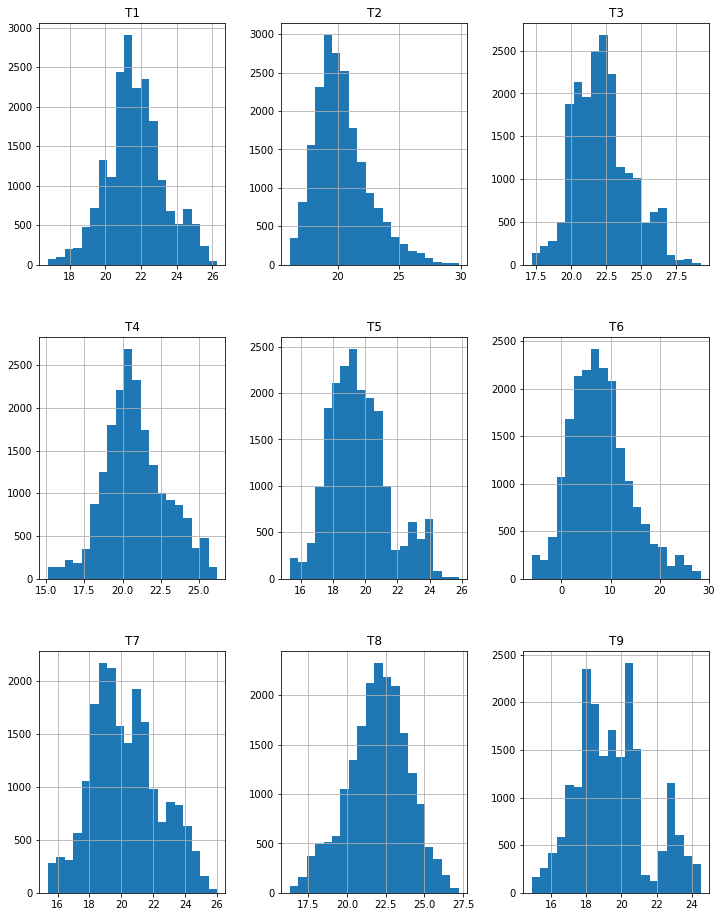

In [55]:
#Ploting histogram for Temperatures for understanding distribution
cols_temp.hist(bins=20,figsize= (12,16));

In [56]:
#Checking the humididity variation
cols_humidity = eng_df[['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9']]
cols_humidity.describe()

,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,40.259739,40.420420,39.242500,39.026904,50.949283,54.609083,35.388200,42.936165,41.552401
std,3.979299,4.069813,3.254576,4.341321,9.022034,31.149806,5.114208,5.224361,4.151497
min,27.023333,20.463333,28.766667,27.660000,29.815000,1.000000,23.200000,29.600000,29.166667
25%,37.333333,37.900000,36.900000,35.530000,45.400000,30.025000,31.500000,39.066667,38.500000
50%,39.656667,40.500000,38.530000,38.400000,49.090000,55.290000,34.863333,42.375000,40.900000
75%,43.066667,43.260000,41.760000,42.156667,53.663333,83.226667,39.000000,46.536000,44.338095
max,63.360000,56.026667,50.163333,51.090000,96.321667,99.900000,51.400000,58.780000,53.326667


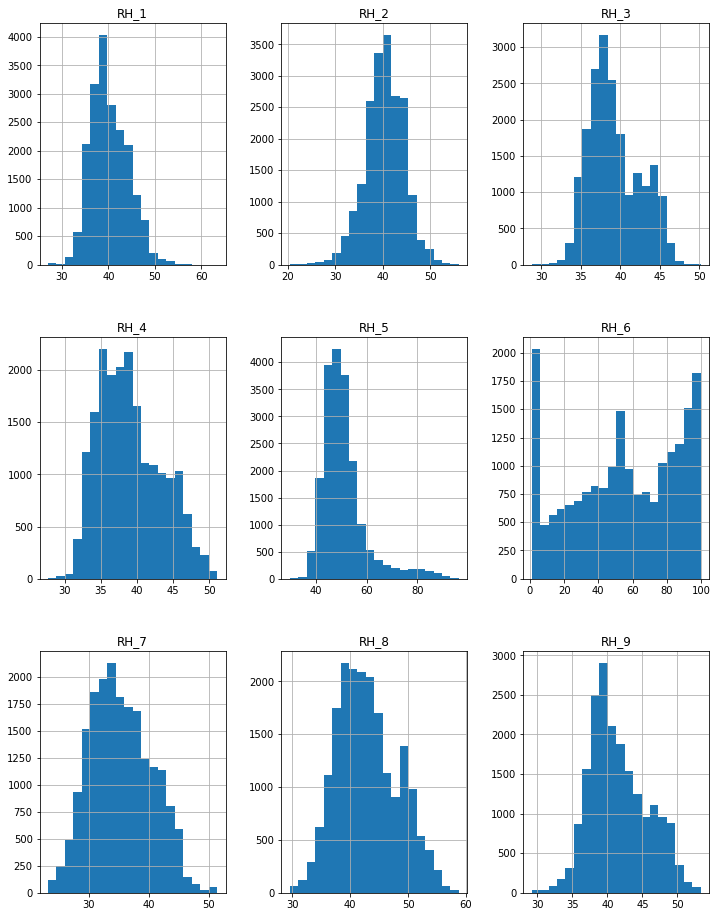

In [57]:
#Ploting Humidity on histogram to find its distribution
cols_humidity.hist(bins=20, figsize=(12,16));

In [58]:
#Checking the weather variation
cols_weather = eng_df[['T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Windspeed','Visibility']]
cols_weather.describe()

,T_out,Press_mm_hg,RH_out,Windspeed,Windspeed,Visibility
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,7.411665,755.522602,79.750418,4.039752,4.039752,38.330834
std,5.317409,7.399441,14.901088,2.451221,2.451221,11.794719
min,-5.000000,729.300000,24.000000,0.000000,0.000000,1.000000
25%,3.666667,750.933333,70.333333,2.000000,2.000000,29.000000
50%,6.916667,756.100000,83.666667,3.666667,3.666667,40.000000
75%,10.408333,760.933333,91.666667,5.500000,5.500000,40.000000
max,26.100000,772.300000,100.000000,14.000000,14.000000,66.000000


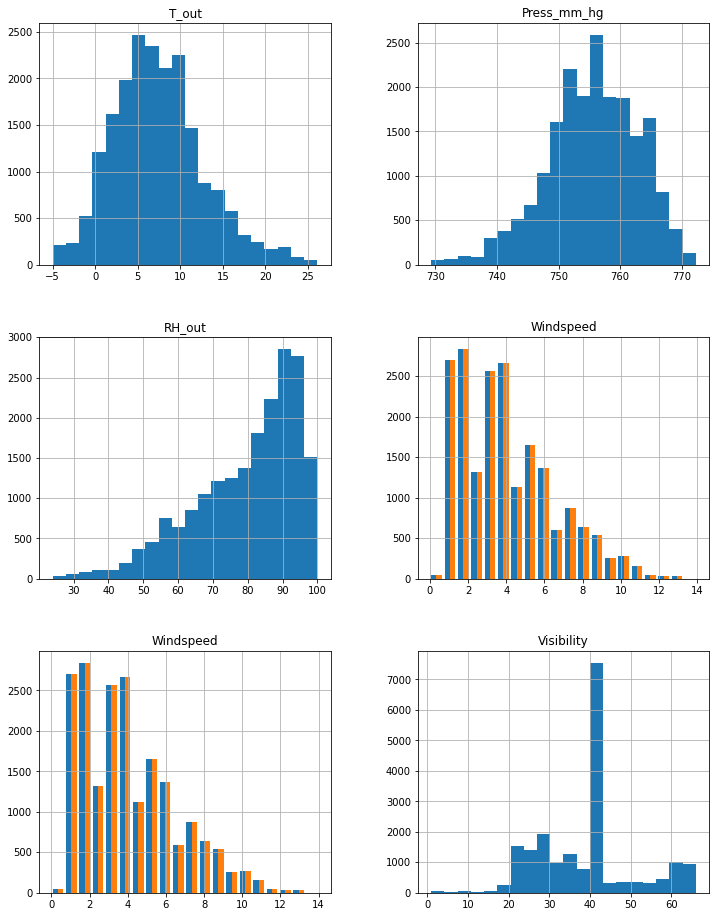

In [59]:
#Ploting the histogram on weather to find distribution
cols_weather.hist(bins=20, figsize=(12,16));

In [60]:
#Checking the random variable variation
cols_random = eng_df[['rv1','rv2']]
cols_random.describe()

,rv1,rv2
count,19735.000000,19735.000000
mean,24.988033,24.988033
std,14.496634,14.496634
min,0.005322,0.005322
25%,12.497889,12.497889
50%,24.897653,24.897653
75%,37.583769,37.583769
max,49.996530,49.996530


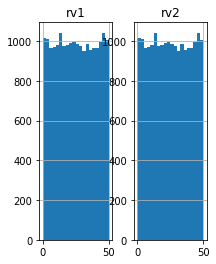

In [61]:
#Ploting the random variable variation
cols_random.hist(bins=20, figsize=(3,4));

In [62]:
eng_df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


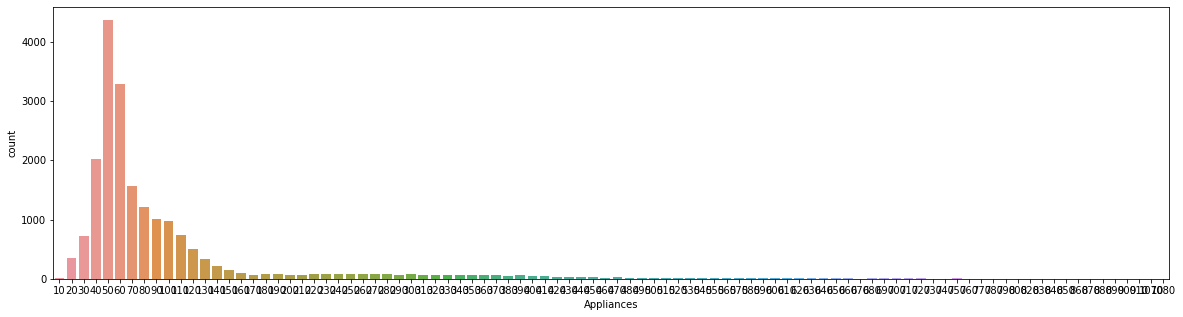

In [63]:
#Ploting the graphical representation of Appliance
plt.subplots(figsize=(20,5))
sns.countplot(eng_df['Appliances'])

In [64]:
#Checking the describtion
eng_df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


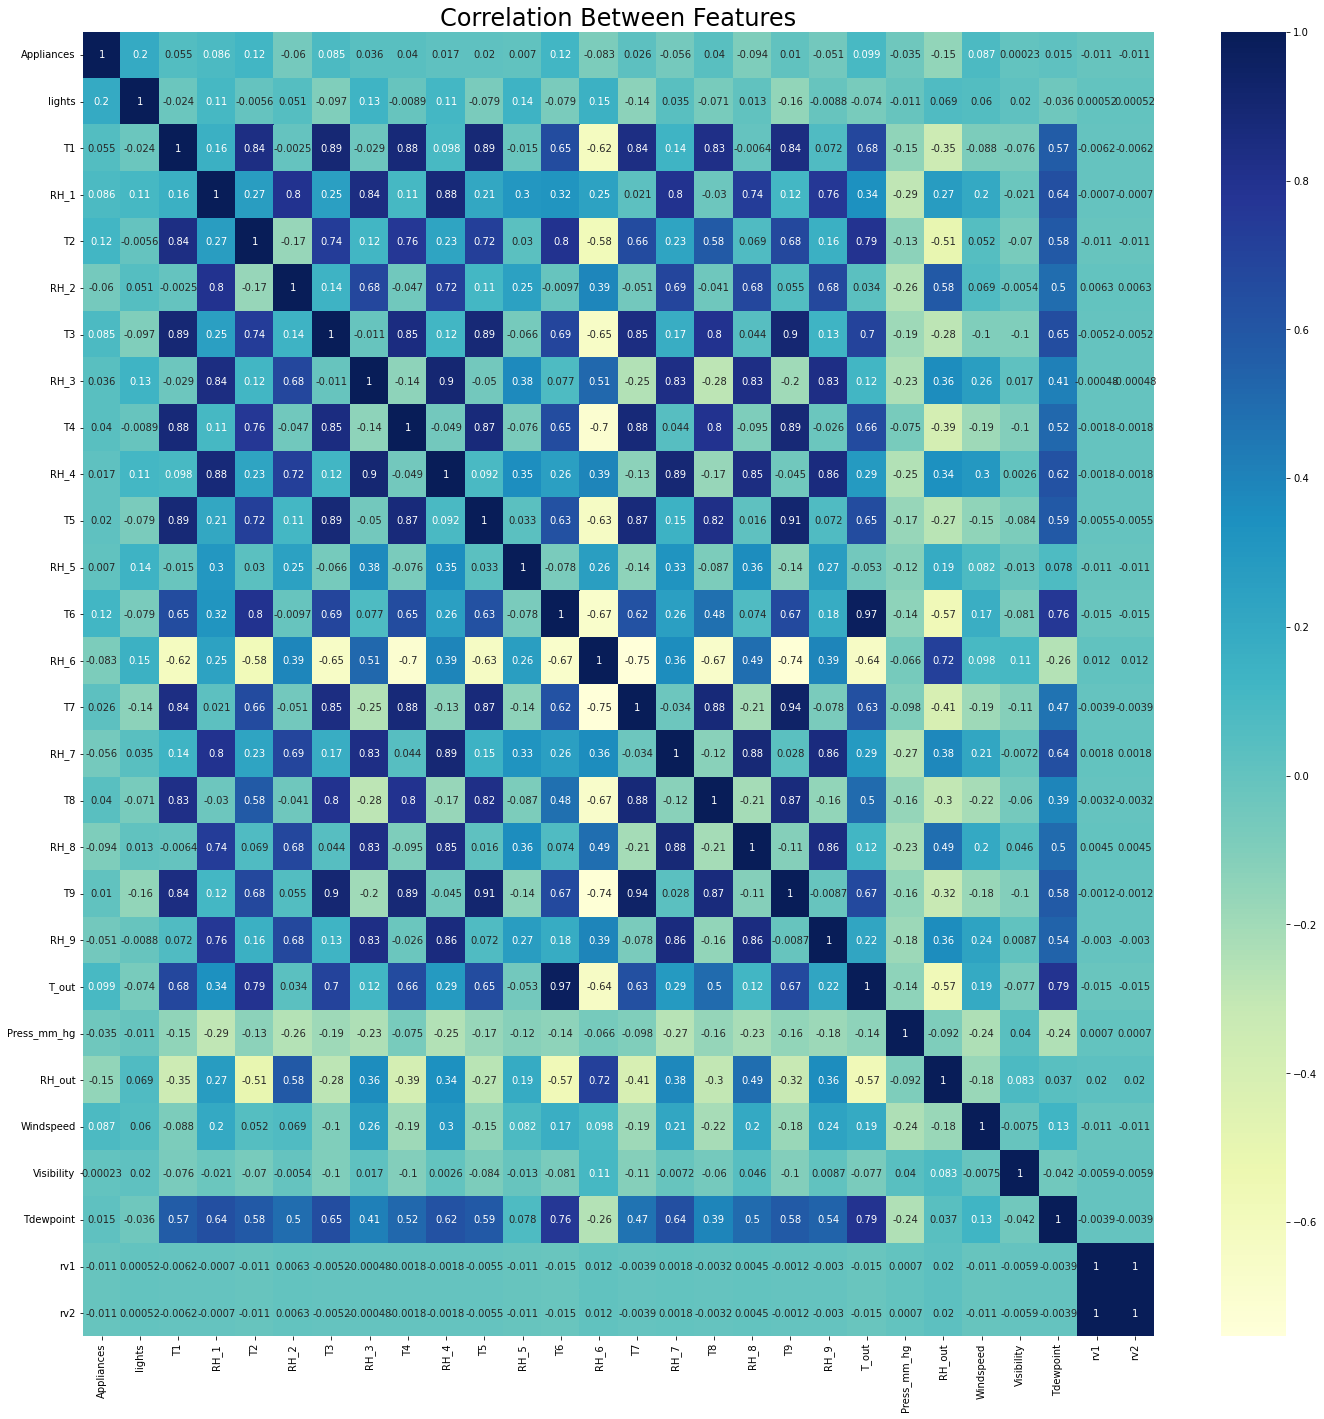

In [65]:
#Plotting correlation heatmap
plt.subplots(figsize=(24,24))
plt.title("Correlation Between Features",fontsize = 24)
sns.heatmap(eng_df.corr(), cmap='YlGnBu', annot=True)

#**Predictive Modelling**

In [66]:
#Droping the date columns as irrelevent
eng_df.drop(['date','lights'],axis=1, inplace=True)

In [67]:
#Defining x & Y variable for traning and testing model
x = eng_df[['RH_1','T3','RH_6','RH_8','T_out','Windspeed']]
y = eng_df['Appliances']


In [68]:
#Spliting the data between traning and testing with ratio of 7:3
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=42)

In [69]:
#Scalling the train data with standard scaler
from sklearn.preprocessing import StandardScaler
train_sc = StandardScaler()
train_sc.fit_transform(xtrain)
xtrain

,RH_1,T3,RH_6,RH_8,T_out,Windspeed
9129,35.626667,21.700000,48.956667,39.290000,0.250000,2.000000
2453,44.560000,19.823333,86.700000,45.200000,3.166667,2.000000
9152,35.400000,21.700000,61.860000,39.060000,-1.566667,1.333333
12694,43.260000,23.390000,26.620000,38.834000,8.833333,1.666667
16952,42.360000,26.171429,1.000000,45.056000,21.433333,2.000000
...,...,...,...,...,...,...
11284,40.900000,23.000000,48.826667,45.466667,9.566667,6.666667
11964,43.700000,22.700000,20.223333,47.000000,17.300000,2.000000
5390,35.700000,20.100000,82.900000,41.700000,-1.066667,3.666667
860,35.560000,21.200000,96.833333,39.475000,2.066667,1.333333


In [71]:
#Implimenting LinearRegression model for defined variable
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(xtrain,ytrain)
y_pred_lr_train = lr_model.predict(xtrain)
mae_train_lr = metrics.mean_absolute_error(ytrain, y_pred_lr_train)


#Predicting result of ytest and evaluatin with MAE
from sklearn.metrics import mean_absolute_error
y_pred_lr_test = lr_model.predict(xtest)
mae_test_lr = metrics.mean_absolute_error(ytest,y_pred_lr_test)


#Printing the result of traning and testing test on MAE
print('MAC Score for Train: ', mae_train_lr)
print('MAC Score for Test : ', mae_test_lr)

MAC Score for Train:  56.31994581096887
MAC Score for Test :  56.56256182458302


In [72]:
#Implementing the Decision Tree Regressor on derive traning dataset
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(xtrain,ytrain)
y_pred_dt_train = dt_model.predict(xtrain)
mae_train_dt = metrics.mean_absolute_error(ytrain,y_pred_dt_train)


#Predicting result of ytest and evaluatin with MAE
y_pred_dt_test = dt_model.predict(xtest)
mae_test_dt = metrics.mean_absolute_error(ytest,y_pred_dt_test)


#Printing the result of traning and testing test on MAE
print('MAC Score for train: ', mae_train_dt)
print('MAC Score for Test : ', mae_test_dt)

MAC Score for train:  0.0007239032865209208
MAC Score for Test :  42.02668468164161


In [73]:
#Implenting the RangdomForedt on derived datasets
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(xtrain,ytrain)
y_pred_rf_train = rf_model.predict(xtrain)
mae_train_rf = metrics.mean_absolute_error(ytrain,y_pred_rf_train)


#Predicting result of ytest and evaluatin with MAE
y_pred_rf_test = rf_model.predict(xtest)
mae_test_rf = metrics.mean_absolute_error(ytest,y_pred_rf_test)


#Printing the result of traning and testing test on MAE
print('MAC Score for Train:',mae_train_rf)
print("MAC Score for Test :", mae_test_rf)

MAC Score for Train: 13.49748443607934
MAC Score for Test : 35.882548555987164


In [74]:
#Implimenting the XGBRegressor on derived dataset
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(xtrain,ytrain)
y_pred_xgb_train = xgb_model.predict(xtrain)
mae_train_xgb = mean_absolute_error(ytrain, y_pred_xgb_train)


#Predicting result of ytest and evaluatin with MAE
xgb_pred_test = xgb_model.predict(xtest)
mae_test_xgb = mean_absolute_error(ytest, xgb_pred_test)

#Printing the result of traning and testing test on MAE
print("MAE Score for Train:", mae_train_xgb)
print('MAE Score for Test :', mae_test_xgb)


[03:37:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE Score for Train: 49.75081828073049
MAE Score for Test : 51.876778175290866


#**Model Validation**

In [75]:
#Importing evaluation metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

0.4742325074251956

In [76]:
#Collect result and aggregating on Table

models = [lr_model, dt_model,rf_model, xgb_model]

def model_metrics(models, xtrain, xtest, ytrain, ytest):
  cols = ['Model','Train MAE', 'Test MAE','Train RMSE', 'Test RMSE','Train R2 Square', 'Test R2 Square']
  model_df = pd.DataFrame(columns=cols)
  model_df.set_index('Model', inplace=True)

  i = 0
  for model in models:
    model.fit(xtrain,ytrain)
    y_pred_train = model.predict(xtrain)
    y_pred_test = model.predict(xtest)

    model_df.loc[i,'Train MAE'] = mean_absolute_error(y_pred_train,ytrain).round(2)
    model_df.loc[i,'Test MAE']  = mean_absolute_error(y_pred_test,ytest).round(2)
    model_df.loc[i,'Train RMSE'] = sqrt(mean_squared_error(y_pred_train,ytrain).round(2))
    model_df.loc[i,'Test RMSE']  = sqrt(mean_squared_error(y_pred_test,ytest).round(2))
    model_df.loc[i,'Train R2 Square'] = r2_score(y_pred_train,ytrain).round(2)
    model_df.loc[i,'Test R2 Square'] = r2_score(y_pred_test,ytest).round(2)


    i += 1
  return model_df 

In [77]:
model = {'Model':['Linear_Regression','Decision Tree','Random Forest','XGBRegressor']}
model_df = pd.DataFrame(model)
result_model = model_metrics(models, xtrain, xtest, ytrain, ytest)
result_model = pd.concat([model_df,result_model],axis=1)
result_table =  result_model.set_index('Model')
result_table

[03:38:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Train MAE,Test MAE,Train RMSE,Test RMSE,Train R2 Square,Test R2 Square
Model,,,,,,
Linear_Regression,56.32,56.56,99.189163,97.8137,-11.92,-11.47
Decision Tree,0.0,42.78,0.0,99.893243,1.0,0.01
Random Forest,13.43,35.71,28.13201,73.752017,0.89,-0.38
XGBRegressor,49.75,51.88,89.548199,92.771709,-5.11,-6.26


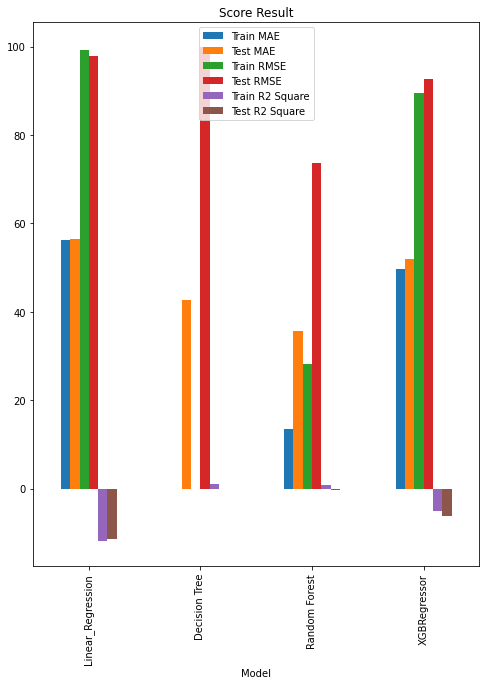

In [78]:
#Ploting the graphical representation of result
result_model.plot(x='Model', y = ['Train MAE', 'Test MAE', 'Train RMSE', 'Test RMSE', 'Train R2 Square','Test R2 Square'], kind='bar', title = 'Score Result', figsize=(8,10) )